In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train=r'E:\New folder\Deep Learning\cell_images\train'
test=r'E:\New folder\Deep Learning\cell_images\valid'

In [4]:
img_width = 224
img_height = 224

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [6]:
train_data_generator = datagen.flow_from_directory(train,
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 17638 images belonging to 2 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(test,
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 1102 images belonging to 2 classes.


In [8]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:

history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1103 steps, validate for 69 steps
Epoch 1/5
1103/1103 [==============================] - 1065s 966ms/step - loss: 0.7134 - accuracy: 0.5071 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
1103/1103 [==============================] - 1126s 1s/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5018
Epoch 3/5
1103/1103 [==============================] - 983s 891ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5064
Epoch 4/5
1103/1103 [==============================] - 942s 854ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
1103/1103 [==============================] - 960s 870ms/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5000


In [13]:
history.history

{'loss': [0.7134150019483051,
  0.6932043211708021,
  0.6932028093120655,
  0.6931932875258215,
  0.6932035664377171],
 'accuracy': [0.5071437, 0.49648488, 0.49569112, 0.497392, 0.4917224],
 'val_loss': [0.6931005604025247,
  0.6930741814599521,
  0.6931000274160634,
  0.693069855372111,
  0.6930730386056762],
 'val_accuracy': [0.5, 0.5018149, 0.50635207, 0.5, 0.5]}

In [14]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

# Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

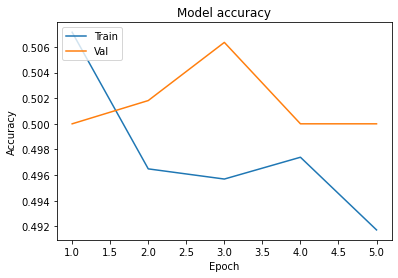

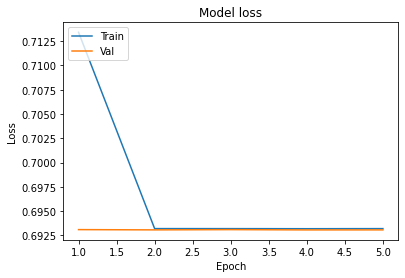

In [15]:
plot_learningCurve(history, 5)

In [16]:
from tensorflow.keras.models import load_model

model.save('maleria_det.h5')

In [17]:
y_pred = model.predict(validation_data_generator)

In [18]:
y_pred

array([[0.49893928],
       [0.49893928],
       [0.49893928],
       ...,
       [0.49869463],
       [0.49893928],
       [0.49893928]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('maleria_det.h5')

In [23]:
img=image.load_img(r'E:\New folder\Deep Learning\cell_images\valid\1.png',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/225

In [27]:
from tensorflow.keras.applications.resnet50 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[0.49893928]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
